# Transport Preference Analysis Project

## Problem Statement

### Context:

Link for the dataset: https://www.kaggle.com/datasets/kunalk0hli/transportxlri

You are in discussions with ABC Consulting company for providing transport for their employees. For this purpose, you are tasked with understanding how do the employees of ABC Consulting prefer to commute presently (between home and office). Based on the parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, you are required to predict the preferred mode of transport.

### Objective:

To determine the preferred mode of transportation, we aim to develop and compare models using XGBoost and Random Forest algorithms. By evaluating their performance, we can identify which model more accurately predicts transportation preferences.


### Data Description

* Age: Age of the Employee in Years
* Gender: Gender of the Employee
* Engineer: For Engineer =1 , Non Engineer =0
* MBA: For MBA =1 , Non-MBA =0
* Work Exp: Experience in years
* Salary: Salary in Lakhs per Annum
* Distance: Distance in km from Home to Office
* license: If Employee has Driving Licence 1, If not, then 0
* Transport: Mode of Transport

## Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore") #to avoid cluttering output with non-critical warnings.

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    #RandomForestRegressor
)

from xgboost import XGBClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models based on hyperparameter
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [2]:
trans = pd.read_csv('/Users/ishashukla/Downloads/Transport.csv') 

In [3]:
# copying data to another variable to avoid any changes to original data
data = trans.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [4]:
data.head() ##  top 5 rows of the data

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [5]:
data.tail() ##  last 5 rows of the data

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


#### Understand the shape of the dataset

In [6]:
data.shape ##view dimensions of the data

(444, 9)

* 444 rows and 9 columns

#### Check the data types of the columns for the dataset

In [7]:
data.info() #code to data type of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [8]:
# checking for duplicate values
data.duplicated().sum()

0

- There are no duplicate values in the data.

## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [9]:
data.describe() ##the statistical summary of the data

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234
std,4.416710,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000
75%,30.000000,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000


In [10]:
data['MBA'].value_counts()

MBA
0    332
1    112
Name: count, dtype: int64

In [11]:
data['Engineer'].value_counts()

Engineer
1    335
0    109
Name: count, dtype: int64

In [12]:
data['license'].value_counts()

license
0    340
1    104
Name: count, dtype: int64

### Observations 

- **Age**: The average age is approximately 27.75 years, with a standard deviation of 4.42 years. This suggests a relatively young workforce.

- **Engineer**: Maximum individuals in ABC Consulting company are engineers.

- **MBA**: There are 112 individuals in company who are MBA graduates.

- **Work Experience**: The average work experience is around 6.3 years, with a standard deviation of 5.11 years, indicating a mix of early to mid-career professionals.

- **Salary**: The average salary is approximately 16.2(in lakhs). 

- **Distance**: The average commute distance is about 11.32 km, with a standard deviation of 3.61 km, indicating moderate variation in commuting distances.

- **License**: Only 23% individuals(104 in count) have license.

These insights provide a snapshot of the demographic and professional characteristics of the dataset. 

In [13]:
data.describe(include='object') ##the statistical summary of the data of categorical variables

,Gender,Transport
count,444,444
unique,2,2
top,Male,Public Transport
freq,316,300


- **Gender**: Male individuals are more in number than Female.
- **Transport**: Mostly people prefer public transport.

#### Let's check the count of each unique category in each of the categorical variables

In [14]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Gender
Male      316
Female    128
Name: count, dtype: int64
--------------------------------------------------
Transport
Public Transport     300
Private Transport    144
Name: count, dtype: int64
--------------------------------------------------


### Univariate Analysis - It is a statistical method that examines a single variable in a data set

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline( #vertical lines on a plot at a specific x-coordinate
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on age

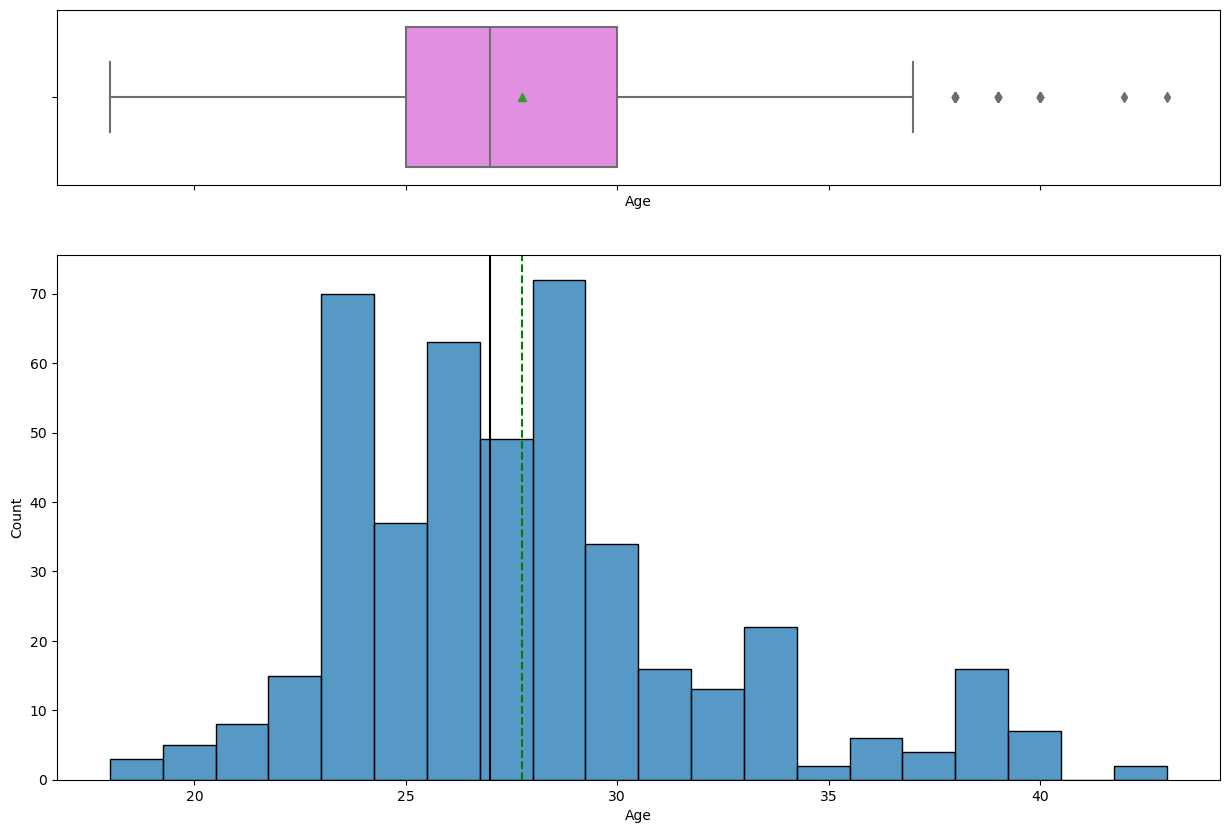

In [16]:
histogram_boxplot(data, "Age")

* The distribution of the age is right skewed


#### Observations on work experience

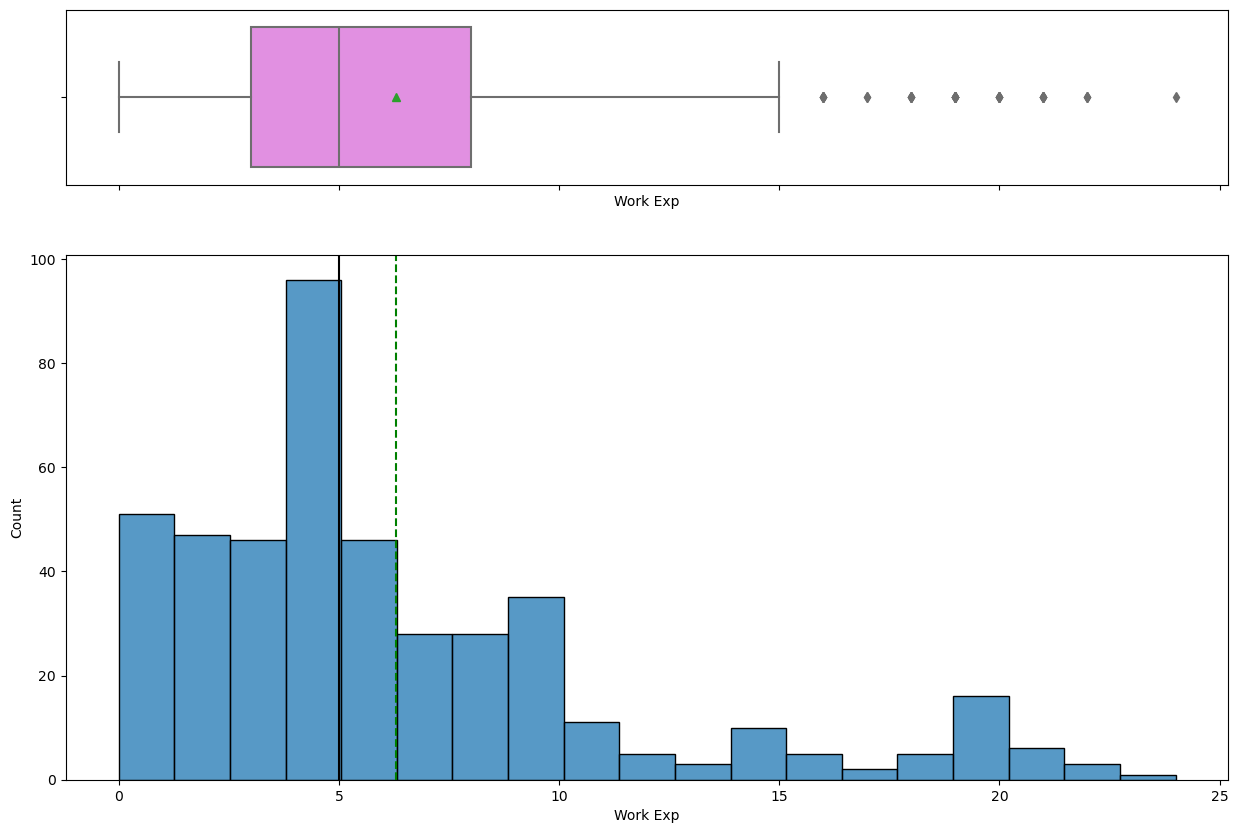

In [17]:
histogram_boxplot(data, 'Work Exp')

* Work Experience is also right-skewed (positively skewed)

In [18]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Gender

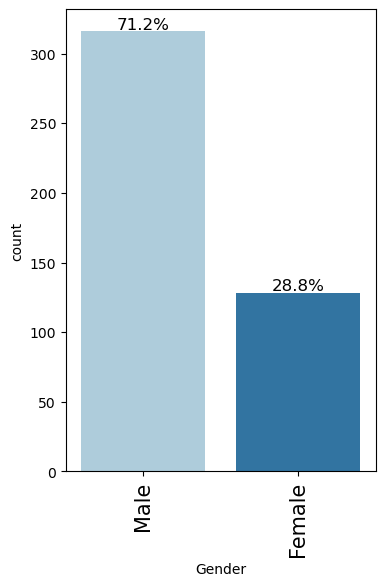

In [19]:
labeled_barplot(data, "Gender", perc=True)

#### Observations on Transport preferred

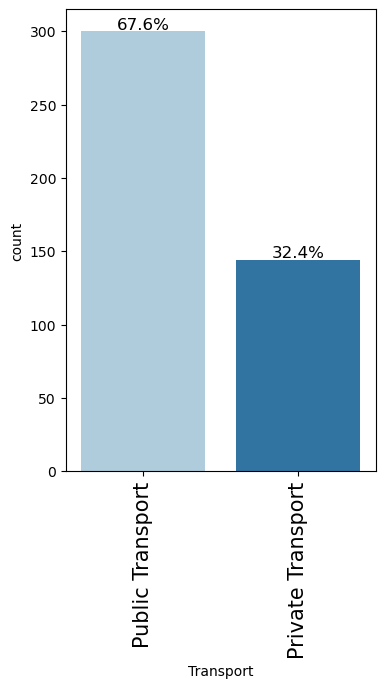

In [20]:
labeled_barplot(data,"Transport",perc=True)

### Bivariate Analysis - It is a statistical method used to investigate the relationship between two variables. 

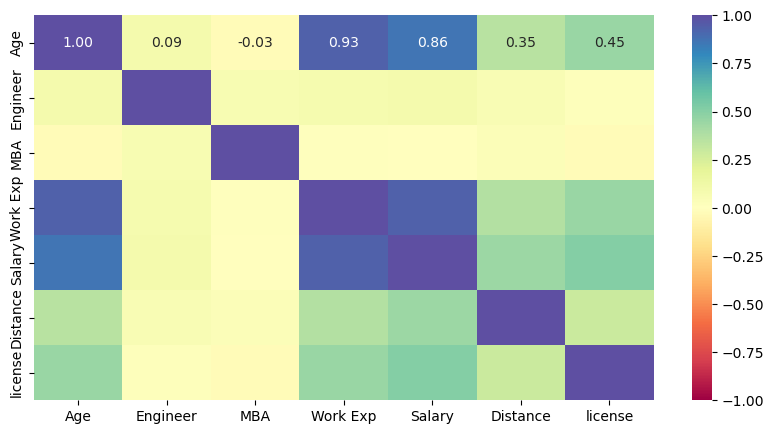

In [21]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [22]:
data[cols_list].corr()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Age,1.000000,0.091935,-0.029090,0.932236,0.860673,0.352872,0.452311
Engineer,0.091935,1.000000,0.066218,0.085729,0.086762,0.059316,0.018924
MBA,-0.029090,0.066218,1.000000,0.008582,-0.007270,0.036427,-0.027358
Work Exp,0.932236,0.085729,0.008582,1.000000,0.931974,0.372735,0.452867
Salary,0.860673,0.086762,-0.007270,0.931974,1.000000,0.442359,0.508095
Distance,0.352872,0.059316,0.036427,0.372735,0.442359,1.000000,0.290084
license,0.452311,0.018924,-0.027358,0.452867,0.508095,0.290084,1.000000


**Observations from the Correlation Matrix:**

- **Age and Work Experience:** A strong positive correlation (0.93) indicates that older employees tend to have more work experience.

- **Age and Salary:** A strong positive correlation (0.86) suggests that older employees generally earn higher salaries.

- **Work Experience and Salary:** A strong positive correlation (0.93) implies that employees with more work experience typically have higher salaries.

- **Distance and Salary:** A moderate positive correlation (0.44) indicates that employees with longer commutes tend to have higher salaries.

- **License and Salary:** A moderate positive correlation (0.51) suggests that employees with a driving license generally earn higher salaries.

**There is a strong correlation between age, salary, and work experience, as age increases, so do work experience and salary, while salary also shows some correlation with the license and distance variable.**

In [23]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Let's find out if Gender  has any impact on Transport Preference

Transport  Private Transport  Public Transport  All
Gender                                             
All                      144               300  444
Male                      93               223  316
Female                    51                77  128
------------------------------------------------------------------------------------------------------------------------


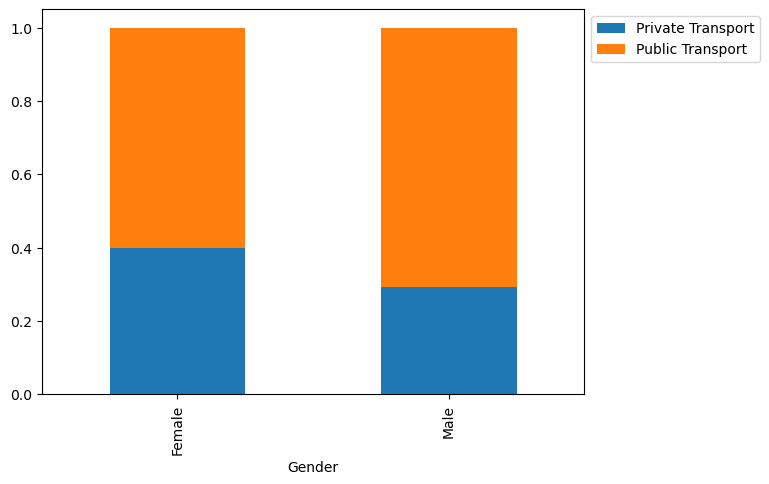

In [24]:
stacked_barplot(data, "Gender", "Transport")

- The  stacked barblot reveals a higher usage of public transport compared to private transport, with more males using both transport types than females.
- In contrast, females show a more balanced usage between private and public transport, with 51 females using private transport and 77 using public transport.

Checking if the Work Experience  of the employee has any relation with preference of the transport

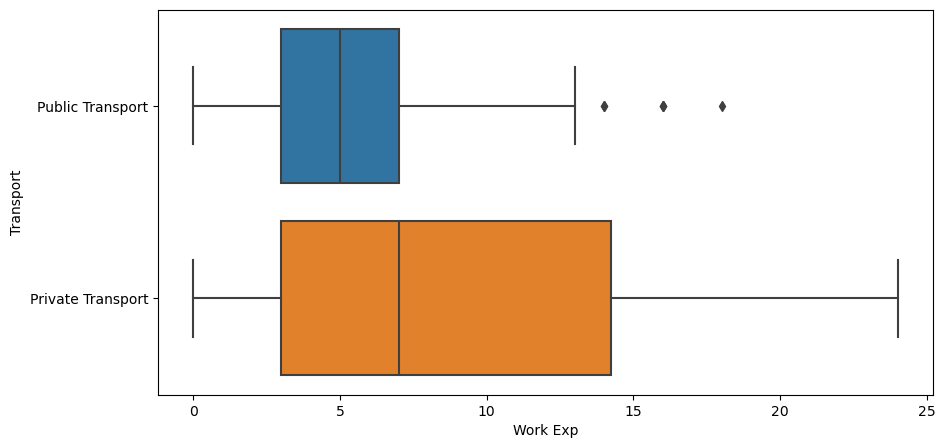

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Work Exp", y="Transport")
plt.show()

* Individuals using private transport generally have more work experience than those using public transport.
* **For Public Transport:**
    - Interquartile Range (IQR): ~2 to 13 years
    - Median Work Experience: ~5 years
    - Whiskers: ~(0-3),(7-13) years
    - Outliers: 3 outliers around 14, 16, and 18 years
* **For Private Transport:**
    - Interquartile Range (IQR): ~3 to 14 years
    - Median Work Experience: ~7 years
    - Whiskers: ~(0-3) to (14-24) years
    - Outliers: None

#### Checking if the Age of the employee has any relation with preference of the Transport

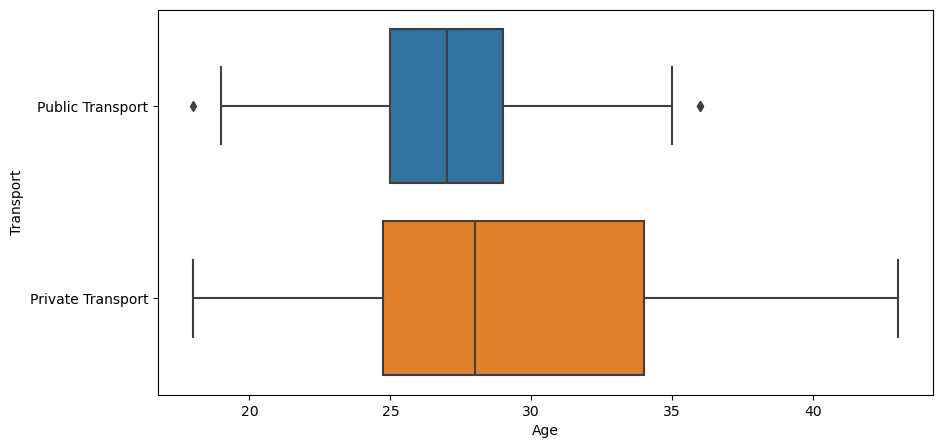

In [26]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Age", y="Transport")
plt.show()

* Private Transport exhibits a wider range of ages, suggesting it accommodates a more diverse age group.
* Public Transport users are generally within a narrower age range, with a couple of notable exceptions.
* **For Public Transport:**
    - Interquartile Range (IQR): 25 to 29 years
    - Median Age: ~28.5 years
    - Whiskers: (19-25) to (29-35) years
    - Outliers: One around 20 years and another around 38 years
* **For Private Transport:**
    - Interquartile Range (IQR): 24 to 34 years
    - Median Work Experience: ~28.5 years
    - Whiskers: 18 to 44 years
    - Outliers: None
 
**Younger employees tend to prefer public transport, while older employees are more likely to use private transport.**

## Data Pre-processing

### Outlier Check

- Let's check for outliers in the data.

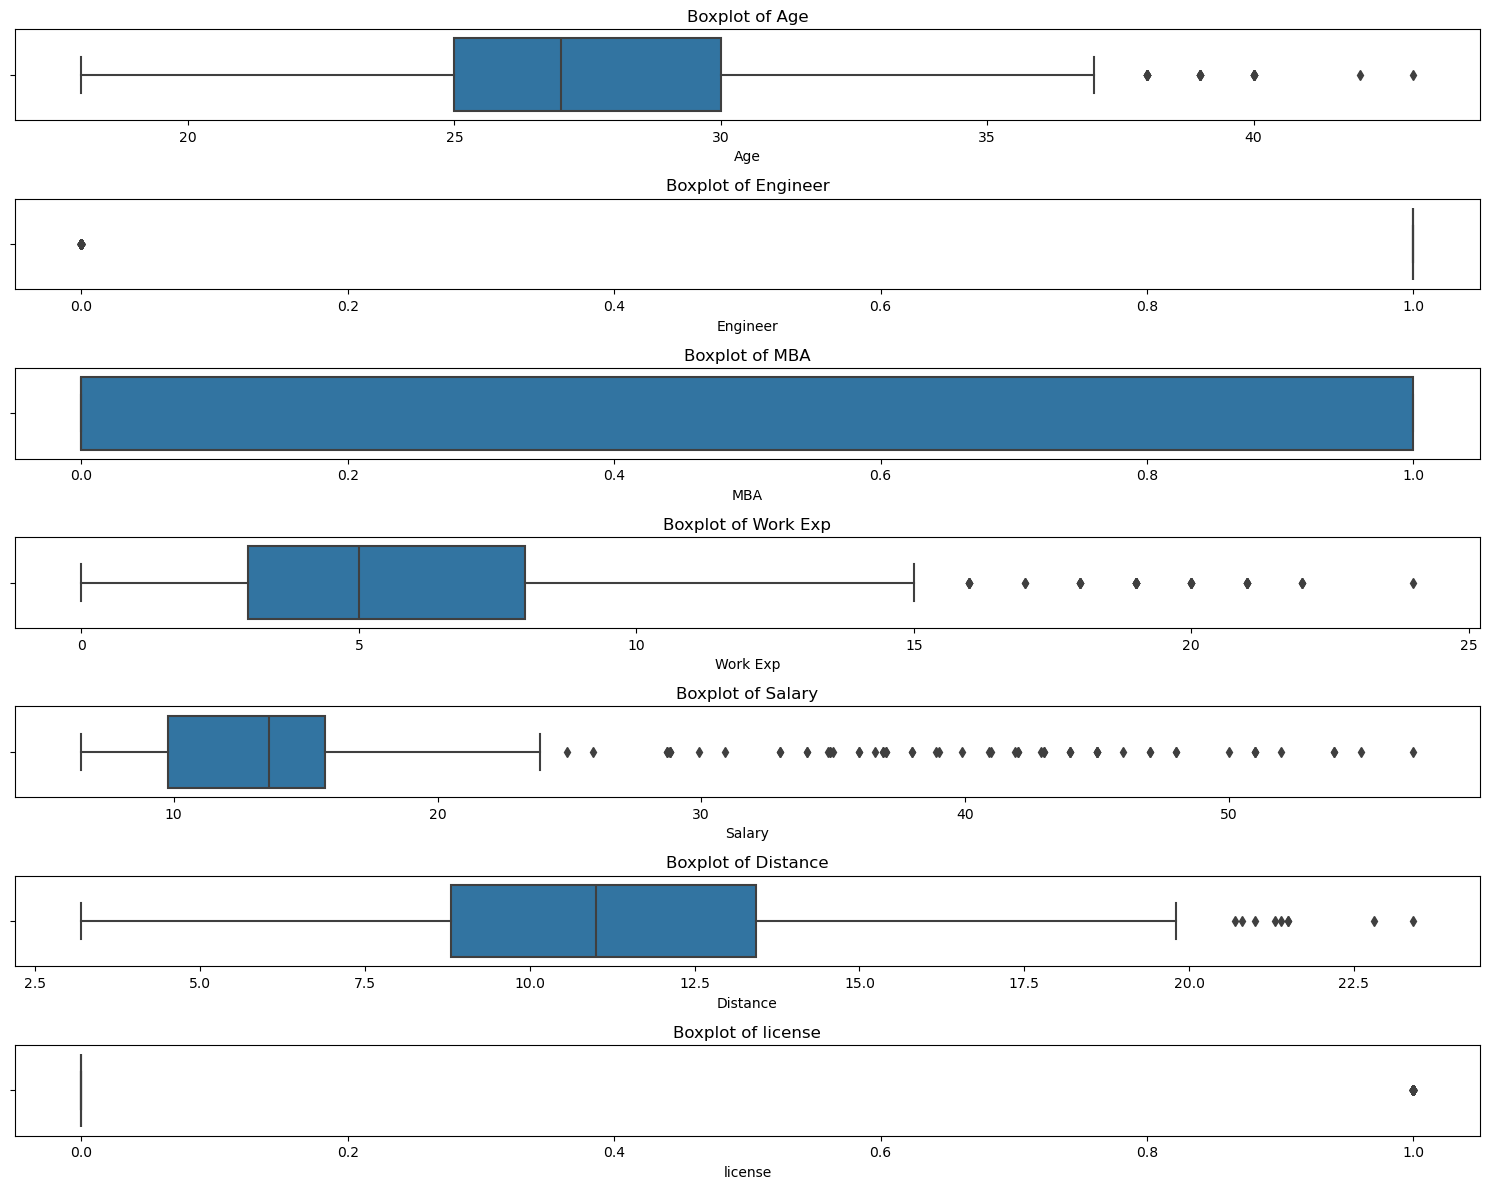

In [27]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.title(f'Boxplot of {variable}')

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

**While there are outliers in the Age, Work experience, Salary and Distance variables, they are not extreme enough to affect the dataset's integrity. These outliers are slightly above the upper limit but remain within an acceptable range, so we are not addressing them.**

### Data Preparation for modeling

- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [28]:
trans.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [29]:
data["Gender"] = data["Gender"].apply(lambda x: 1 if x == "Male" else 0) # encode the object type of data into numerical
data["Transport"]= data["Transport"].apply(lambda x: 1 if x == "Public Transport" else 0) # encode the object type of data into numerical

# Encoding Gender
#data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})  # Assuming only "Male" and "Female" are present
# Encoding Transport
#data["Transport"] = data["Transport"].map({"Public Transport": 1, "Private Transport": 0})  # Assuming these categories


X = data.drop("Transport", axis=1)  ## droping Transport from the data
Y = data["Transport"]


X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.30, random_state=1
)
# test_size=0.30, 30% of the data will be used for testing, and the remaining 70% will be used for training
# random_state=1, By setting random_state to a fixed value (like 1), you ensure that every time you run the code, 
# the data will be split in exactly the same way. 

In [30]:
data.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,1,0,0,4,14.3,3.2,0,1
1,23,0,1,0,4,8.3,3.3,0,1
2,29,1,1,0,7,13.4,4.1,0,1
3,28,0,1,1,5,13.4,4.5,0,1
4,27,1,1,0,4,13.4,4.6,0,1


In [31]:
data.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,1,1,0,20,57.0,21.4,1,0
440,38,1,1,0,19,44.0,21.5,1,0
441,37,1,1,0,19,45.0,21.5,1,0
442,37,1,0,0,19,47.0,22.8,1,0
443,39,1,1,1,21,50.0,23.4,1,0


In [32]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (310, 8)
Shape of test set :  (134, 8)
Percentage of classes in training set:
Transport
1    0.670968
0    0.329032
Name: proportion, dtype: float64
Percentage of classes in test set:
Transport
1    0.686567
0    0.313433
Name: proportion, dtype: float64


## Model evaluation criterion

- **Accuracy**: Proportion of correct predictions (both true positives and true negatives) to total predictions.
- **Precision**: Proportion of true positives to all predicted positives, indicating how many positive predictions were correct.
- **Recall**: Proportion of true positives to all actual positives, indicating how many actual positive cases were detected.
- **F1-score**: Harmonic mean of precision and recall, balancing both metrics, especially in imbalanced datasets.

**Model can make wrong predictions as**:

1. Model predicts that the Public mode of transport is preferred but employee prefers private mode - (false negative)
2. Model predicts that the Private mode of transport is preferred but employee prefers public mode - (false positive)

**Which case is more important?**

Both are important to correctly estimate the number of employees prefering the mode of transport

**How to reduce the losses?**

* `F1 Score` can be used as the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use `balanced class weights so that model focuses equally on both classes`.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

A **confusion matrix** is a table used to evaluate the performance of a classification model by comparing the predicted labels to the true labels. It provides a summary of the model's correct and incorrect predictions, organized into four categories:

**Explanation of Terms:**
* **True Positive (TP):**  The model correctly predicted a positive label.
* **True Negative (TN):**  The model correctly predicted a negative label.
* **False Positive (FP):** The model incorrectly predicted a positive label (type I error).
* **False Negative (FN):** The model incorrectly predicted a negative label (type II error).

In [34]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.unique(target), yticklabels=np.unique(target))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

## Bagging - Model Building and Hyperparameter Tuning

`Bagging (Bootstrap Aggregating)` is an ensemble learning technique that improves the performance and stability of machine learning algorithms by reducing variance. The method works by training multiple versions of the same model on different subsets of the data and averaging their predictions to enhance overall performance.

Link for my post - https://www.linkedin.com/pulse/what-bagging-isha-shukla-zjwpc/?trackingId=GgxPX27FS2aiADtnKhiaZw%3D%3D

### Bagging Classifier

In [35]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)## fit bagging classifier on the train data

BaggingClassifier(random_state=1)

#### Checking model performance on training set

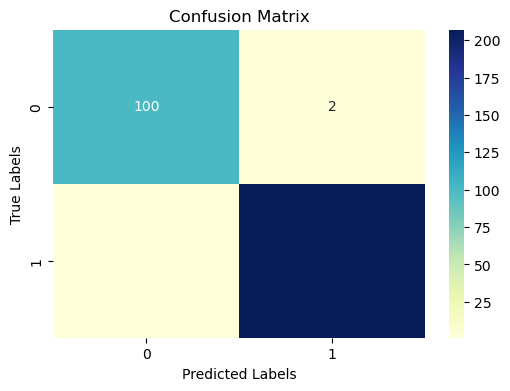

In [36]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [37]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.990323,0.995192,0.990431,0.992806


#### Checking model performance on test set

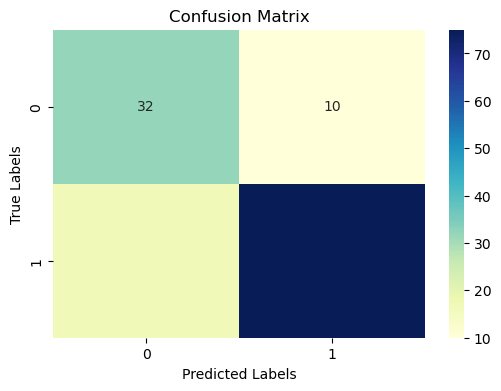

In [38]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test) ## confusion matrix for test data

In [39]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test) ## check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.798507,0.815217,0.882353,0.847458


### Hyperparameter Tuning - Bagging Classifier

Hyperparameter tuning improves the performance of a Bagging Classifier by finding the optimal combination of parameters. This is done using techniques like Grid SearchCV. 

In [40]:
%%time
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

CPU times: user 7.1 s, sys: 129 ms, total: 7.23 s
Wall time: 7.27 s


BaggingClassifier(max_features=0.5, max_samples=0.8, n_estimators=50,
                  random_state=1)

#### Checking model performance on training set

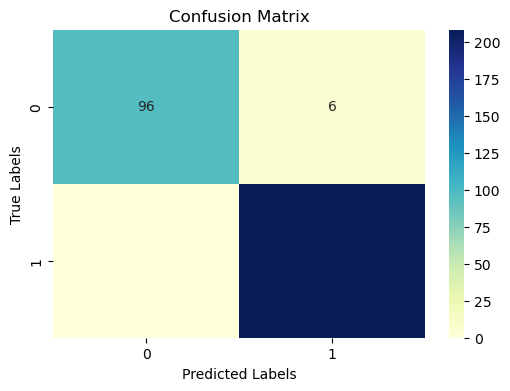

In [41]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train) ##confusion matrix for train data on tuned estimator

In [42]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_train, y_train) ##check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.980645,1.0,0.971963,0.985782


#### Checking model performance on test set

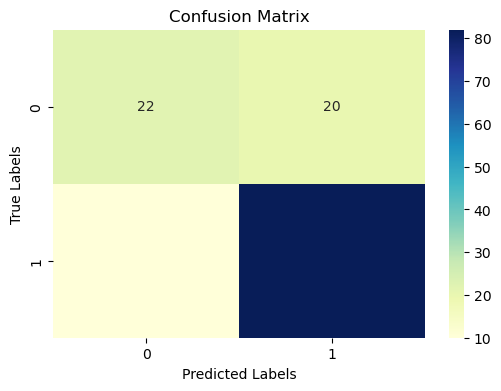

In [43]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test) ##confusion matrix for test data on tuned estimator

In [44]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned,X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.776119,0.891304,0.803922,0.845361


### Random Forest

- An ensemble learning technique that builds multiple decision trees and combines their predictions.
- It uses bootstrap aggregation (bagging) to reduce overfitting.

In [45]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced') ##random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(X_train,y_train) ##  fit random forest on the train data

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

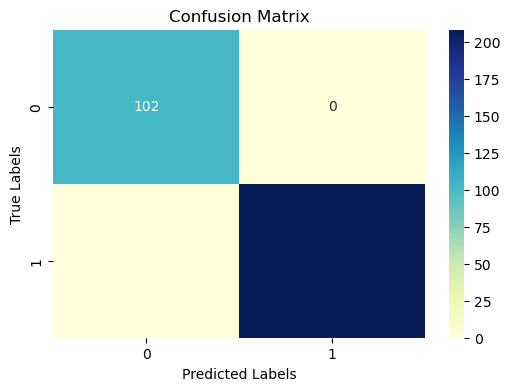

In [46]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train) ##confusion matrix for train data

In [47]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train) #check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

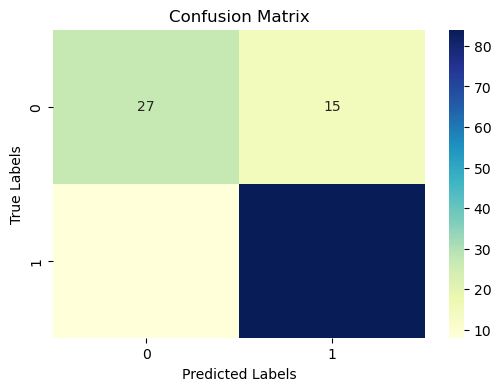

In [48]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test) #confusion matrix for test data

In [49]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test) ## Complete the code to check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.828358,0.913043,0.848485,0.879581


### Hyperparameter Tuning - Random Forest

In [50]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    'n_estimators': [50, 100, 150],  # number of trees in the forest
    'max_depth': [None, 10, 20, 30]   # maximum depth of the tree  
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1) ## grid search with cv = 5 and n_jobs = -1
grid_obj =  grid_obj.fit(X_train, y_train) ## fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, oob_score=True,
                       random_state=1)

#### Checking model performance on training set

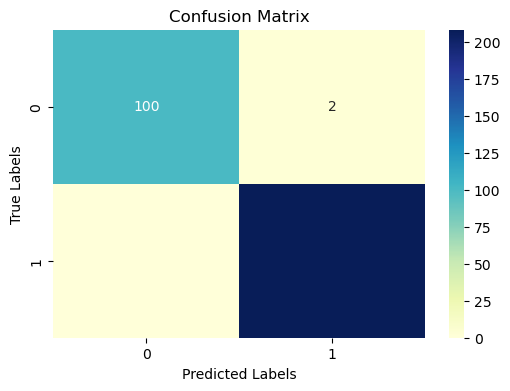

In [51]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)  #confusion matrix for train data on tuned estimator

In [52]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train) ## check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.993548,1.0,0.990476,0.995215


#### Checking model performance on test set

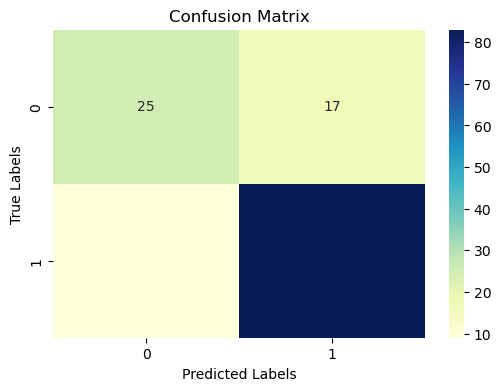

In [53]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test) ##confusion matrix for test data on tuned estimator

In [54]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) ## performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.80597,0.902174,0.83,0.864583


### XGBoost Classifier

- A boosting algorithm that builds models sequentially, with each iteration correcting the errors of the previous one.
- Highly optimized for performance and speed.

In [55]:
xgb_classifier = XGBClassifier(random_state=1)#XGBoost classifier with random state = 1
xgb_classifier.fit(X_train, y_train) # Fit the XGBoost classifier on the train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

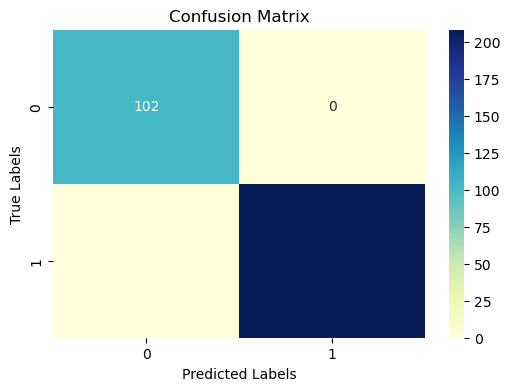

In [56]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train) #confusion matrix for train data

In [57]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train) #performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

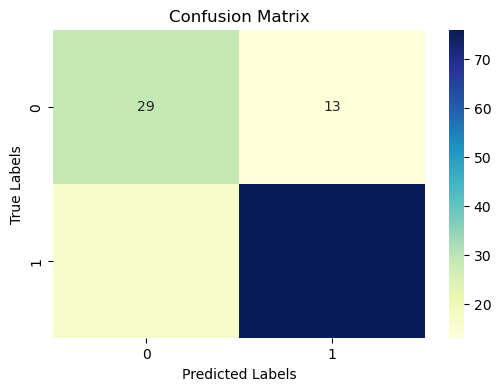

In [58]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test) #confusion matrix for test data

In [59]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test) ## check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.783582,0.826087,0.853933,0.839779


### Hyperparameter Tuning - XGBoost Classifier

In [60]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters 
parameters = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# grid search with cross-validation (cv=5)
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)

# Fit the grid search on the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters found
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

#### Checking model performance on training set

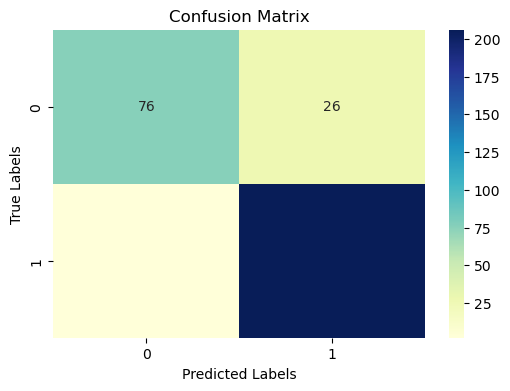

In [61]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train) #confusion matrix for train data on tuned estimator

In [62]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train) #performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.909677,0.990385,0.887931,0.936364


#### Checking model performance on test set

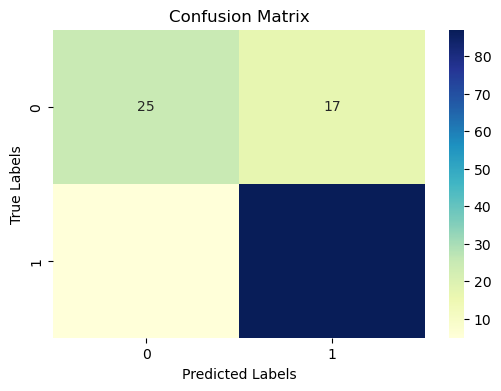

In [63]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test) ## confusion matrix for test data on tuned estimator

In [64]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test) #performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.835821,0.945652,0.836538,0.887755


## Model Comparison and Final Model Selection

**Comparing all models**

In [65]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [

    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "XGboost Classifier",
    "Tuned XGboost Classifier",

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,XGboost Classifier,Tuned XGboost Classifier
Accuracy,0.990323,0.980645,1.0,0.993548,1.0,0.909677
Recall,0.995192,1.000000,1.0,1.000000,1.0,0.990385
Precision,0.990431,0.971963,1.0,0.990476,1.0,0.887931
F1,0.992806,0.985782,1.0,0.995215,1.0,0.936364


In [66]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [

    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "XGboost Classifier",
    "Tuned XGboost Classifier",

]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,XGboost Classifier,Tuned XGboost Classifier
Accuracy,0.798507,0.776119,0.828358,0.805970,0.783582,0.835821
Recall,0.815217,0.891304,0.913043,0.902174,0.826087,0.945652
Precision,0.882353,0.803922,0.848485,0.830000,0.853933,0.836538
F1,0.847458,0.845361,0.879581,0.864583,0.839779,0.887755


### Important features of the final model

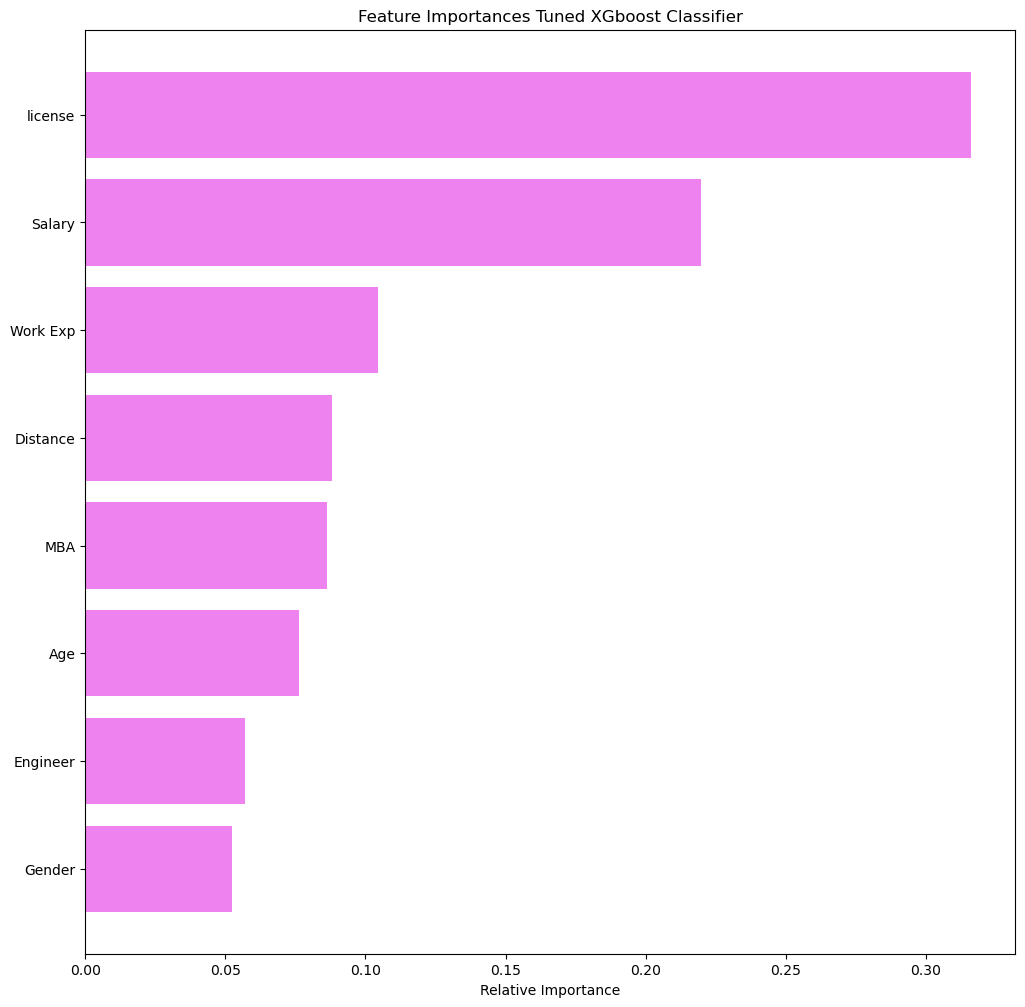

In [67]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_  #the variable corresponding to the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances Tuned XGboost Classifier")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

___

The performance metrics for the various classifiers during training and testing reveal notable insights into their effectiveness. Here's an observation breakdown:

### Training Performance:
1. **Bagging Classifier**:
   - High accuracy (0.9903), recall (0.9952), and precision (0.9904), with a solid F1 score (0.9928).
   - Indicates overfitting as the testing metrics drop significantly.

2. **Tuned Bagging Classifier**:
   - Slightly reduced training accuracy (0.9806) compared to the base Bagging Classifier, but recall remains perfect (1.0).
   - Precision decreases to 0.972, resulting in a reduced F1 score (0.9858).

3. **Random Forest**:
   - Perfect scores across all metrics during training (accuracy, recall, precision, and F1 at 1.0).
   - Clear signs of overfitting since testing metrics differ.

4. **Tuned Random Forest**:
   - Similar near-perfect performance (accuracy: 0.9935, recall: 1.0, precision: 0.9905, F1: 0.9952).
   - Marginally less overfitting than the untuned version.

5. **XGBoost Classifier**:
   - Perfect scores (accuracy, recall, precision, and F1 at 1.0) during training, indicative of overfitting.

6. **Tuned XGBoost Classifier**:
   - Accuracy drops to 0.9097, along with precision (0.8879) and F1 score (0.9364).
   - Suggests that tuning reduces overfitting but may compromise training performance.

---

### Testing Performance:
1. **Bagging Classifier**:
   - Accuracy (0.7985) and F1 score (0.8475) are decent, but there's a noticeable gap from training metrics.
   - Precision (0.8824) and recall (0.8152) indicate a slight bias towards positive class predictions.

2. **Tuned Bagging Classifier**:
   - Testing accuracy drops to 0.7761, showing slight underperformance compared to the untuned version.
   - Higher recall (0.8913) but reduced precision (0.8039) shows improved sensitivity at the cost of some false positives.

3. **Random Forest**:
   - Best testing accuracy (0.8283) among untuned models, with an F1 score of 0.8796.
   - Precision (0.8485) and recall (0.9130) are well-balanced, indicating robustness.

4. **Tuned Random Forest**:
   - Accuracy (0.8060) is slightly lower than the untuned version but still robust.
   - Precision (0.83) and recall (0.9022) maintain a good balance, indicating less overfitting after tuning.

5. **XGBoost Classifier**:
   - Testing accuracy (0.7836) and F1 score (0.8398) are modest.
   - Precision (0.8539) and recall (0.8261) indicate some trade-off in sensitivity.

6. **Tuned XGBoost Classifier**:
   - Best testing accuracy (0.8358) among all models, with a solid F1 score (0.8878).
   - Highest recall (0.9457) among all models, but precision (0.8365) suggests a slight increase in false positives.

---

### Observations:
1. **Overfitting**:
   - Random Forest and XGBoost classifiers display clear signs of overfitting in their untuned versions, achieving perfect scores during training but reduced performance during testing.
   
2. **Model Performance**:
   - **Tuned XGBoost Classifier** achieves the highest testing accuracy (0.8358) and recall (0.9457), making it the best performer for sensitive classifications.
   - **Random Forest** balances accuracy, precision, and recall well, making it a strong contender for real-world scenarios.

3. **Trade-offs**:
   - Bagging classifiers demonstrate reasonable performance but are outperformed by Random Forest and XGBoost, especially in recall and accuracy.

4. **F1 Score Trends**:
   - The F1 scores of tuned models generally indicate better balance between precision and recall compared to untuned models.

### Recommendation:
The **Tuned XGBoost Classifier** is recommended for tasks prioritizing high recall and accuracy. 

Based on the overall performance on both training and testing data, **Tuned XGBoost** appears to be the best model.

### Reasons:
1. **Testing Performance**: 
   - It has the highest **F1 score** (0.887755) and **recall** (0.945652), meaning it strikes a good balance between precision and recall while being particularly good at minimizing false negatives.
   - Despite a slightly lower accuracy compared to Random Forest (0.783582 vs. 0.828358), its higher F1 score and recall make it the more reliable model, especially in applications where false positives and false negatives are critical.

2. **Generalization**: 
   - **Tuned XGBoost** has a solid performance on the test set, indicating it generalizes well and doesn't overfit the training data (which can be a concern for models like Random Forest that have perfect scores on training data).

### Conclusion: 
**Tuned XGBoost** stands out as the best model due to its strong performance across multiple metrics (F1 score, recall, precision) on the testing set. It is likely the most reliable for deployment in real-world scenarios.

In [68]:
model_xgb_predict = xgb_tuned.predict(X_test)

In [69]:
model_xgb_predict

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

In [70]:
probabilities = xgb_tuned.predict_proba(X_test) #designed to give the probability estimates for each class label in a classification task

In [71]:
probabilities

array([[0.3656019 , 0.6343981 ],
       [0.09109342, 0.9089066 ],
       [0.3786204 , 0.6213796 ],
       [0.19658875, 0.80341125],
       [0.7333205 , 0.2666795 ],
       [0.40986335, 0.59013665],
       [0.829188  , 0.17081204],
       [0.79667175, 0.20332825],
       [0.7276021 , 0.2723979 ],
       [0.09109342, 0.9089066 ],
       [0.14294809, 0.8570519 ],
       [0.7484577 , 0.25154236],
       [0.10893953, 0.8910605 ],
       [0.5266633 , 0.47333673],
       [0.08972985, 0.91027015],
       [0.12139535, 0.87860465],
       [0.45835608, 0.5416439 ],
       [0.7382754 , 0.26172456],
       [0.20161426, 0.79838574],
       [0.829188  , 0.17081204],
       [0.11393976, 0.88606024],
       [0.5757454 , 0.4242546 ],
       [0.5970338 , 0.4029662 ],
       [0.16231358, 0.8376864 ],
       [0.14849293, 0.85150707],
       [0.09378219, 0.9062178 ],
       [0.6272242 , 0.3727758 ],
       [0.14004433, 0.85995567],
       [0.14745152, 0.8525485 ],
       [0.14849293, 0.85150707],
       [0.

In [72]:
row_sums = probabilities.sum(axis=1)

In [73]:
preferred_modes = np.argmax(probabilities, axis=1) #input value that produces the maximum output value of a function

In [74]:
preferred_modes

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

In [75]:
transport_mapping = {0: 'Private Transport', 1: 'Public Transport'}
preferred_transport_modes = [transport_mapping[mode] for mode in preferred_modes]

In [76]:
from collections import Counter
mode_distribution = Counter(preferred_transport_modes)
print(mode_distribution)

Counter({'Public Transport': 104, 'Private Transport': 30})


## Insights

- **License:** Employees with a driving license are more likely to prefer private transport, as it facilitates personal vehicle usage.
- **Salary:** Higher-income employees may favor private transport due to affordability, while lower-income groups might prefer public transport for cost-effectiveness.
- **Work Experience:** Employees with more work experience, often older, might lean towards private transport due to stability and convenience.
- **Distance:** Employees traveling longer distances might prefer private transport for comfort and flexibility, whereas shorter distances may encourage public transport use.
- **Age:** Younger employees are more likely to choose public transport due to affordability, while older employees may prioritize the convenience of private transport.

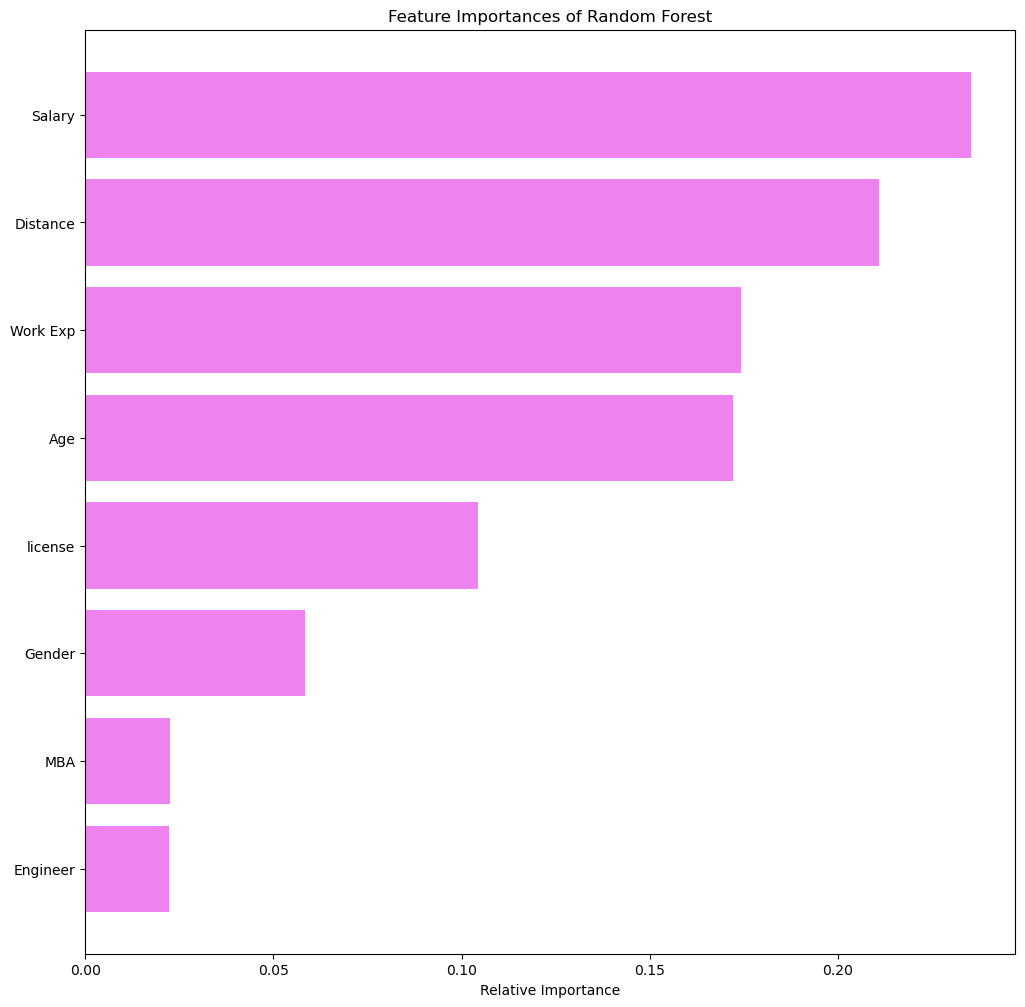

In [77]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_  #the variable corresponding to the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances of Random Forest")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- While all models performed well on training data, Tuned XGBoost exhibited the best balance of accuracy and F1-Score on testing data, making it the most suitable model for this dataset. Future improvements could include handling class imbalances(using SMOTE) and optimizing feature selection.